In [1]:
from data.data import load_data,save_data
from data.analysis.summary import summary
import matplotlib.pyplot as plt
import pandas as pd

df_01 = load_data("02")
material = df_01.pop("Material");
winder_tension = df_01.pop("Winder tension (N)")
support = df_01.pop("Support")

In [2]:
summary(df_01)

Data Summary:
Number of rows: 	 	404
Number of columns: 	 	31
Total missing values: 		451 from 12524 cells
Rows with missing values: 	183
% of rows with missing values: 	45.30%
Percentage of missing values: 	3.60%


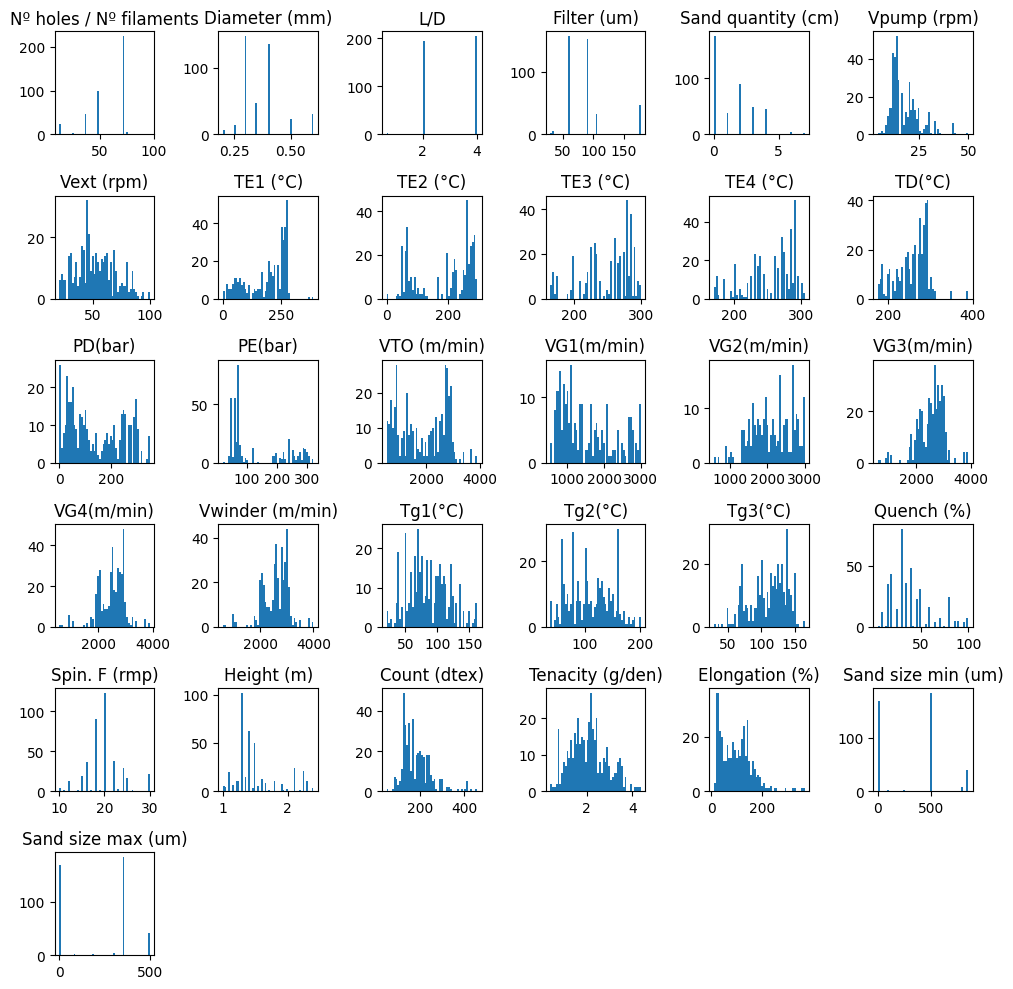

In [3]:
df_01.hist(figsize=(10, 10), bins=50, grid=False);
plt.tight_layout()

In [4]:
# see empty values by column
empty_values = df_01.isnull().sum()
# sort 
empty_values = empty_values.sort_values(ascending=False)
print("Empty values by column:")
print(empty_values[empty_values > 0])

Empty values by column:
VG1(m/min)                 164
VG2(m/min)                 164
Tg3(°C)                     22
Tg1(°C)                     21
Tg2(°C)                     21
Height (m)                  10
Filter (um)                  8
TE4 (°C)                     7
Vwinder (m/min)              5
TE3 (°C)                     5
TE2 (°C)                     5
L/D                          4
Quench (%)                   3
VTO (m/min)                  3
Vext (rpm)                   2
Spin. F (rmp)                2
PD(bar)                      2
TD(°C)                       2
Nº holes / Nº filaments      1
dtype: int64


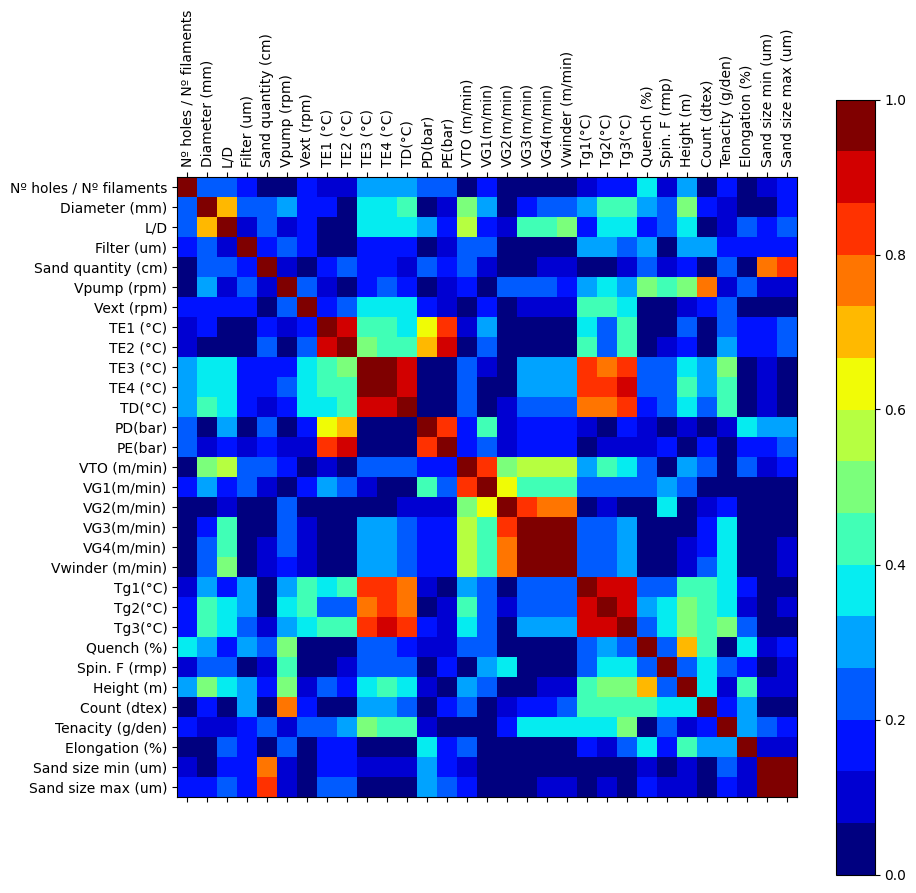

In [5]:
# correlation of Tg3ºC 

correlation = abs(df_01.corr())

# plot 
plt.figure(figsize=(10, 10))
colormap = plt.get_cmap('jet', 15)
plt.matshow(correlation, fignum=1, cmap=colormap, vmin=0, vmax=1)
plt.xticks(range(len(correlation.columns)), correlation.columns, rotation=90);
plt.yticks(range(len(correlation.columns)), correlation.columns);
plt.colorbar()


In [6]:
from data.analysis.most_correlation import most_correlation

In [7]:
top_correlations,df_numeric = most_correlation(df_01, 20)

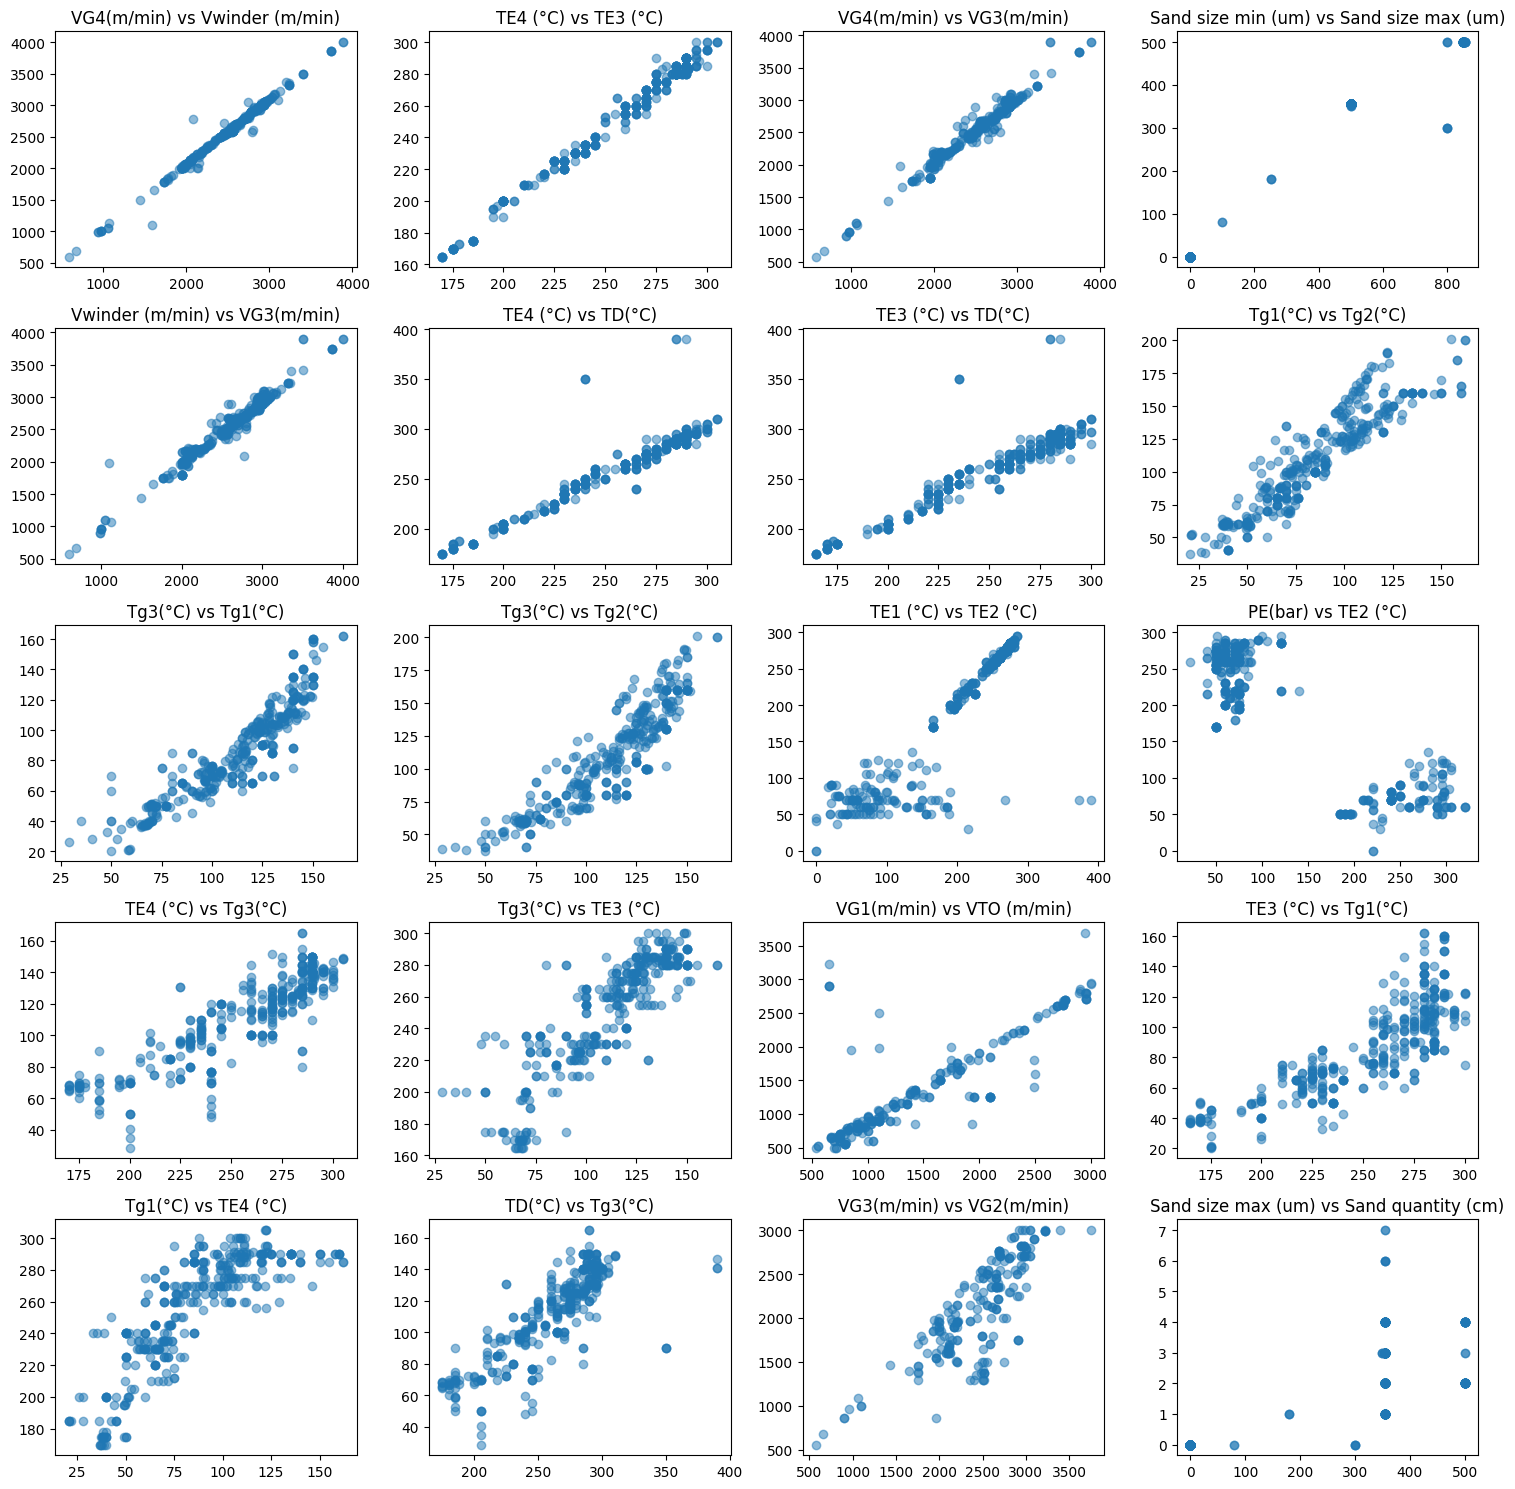

In [8]:
# plot pair of variables with highest correlation
plt.figure(figsize=(15, 15))

for j,(ivar,jvar) in enumerate(top_correlations.index):
    plt.subplot(5, 4, j + 1)
    plt.scatter(df_numeric[ivar], df_numeric[jvar], alpha=0.5)
    plt.title(f"{ivar} vs {jvar}")
plt.tight_layout()

In [9]:
id_nan_Vwibder = df_01[df_01["Vwinder (m/min)"].isnull()].index

r = df_01.loc[id_nan_Vwibder]

In [10]:
df_01.columns

Index(['Nº holes / Nº filaments', 'Diameter (mm)', 'L/D', 'Filter (um)',
       'Sand quantity (cm)', 'Vpump (rpm)', 'Vext (rpm)', 'TE1 (°C)',
       'TE2 (°C)', 'TE3 (°C)', 'TE4 (°C)', 'TD(°C)', 'PD(bar)', 'PE(bar)',
       'VTO (m/min)', 'VG1(m/min)', 'VG2(m/min)', 'VG3(m/min)', 'VG4(m/min)',
       'Vwinder (m/min)', 'Tg1(°C)', 'Tg2(°C)', 'Tg3(°C)', 'Quench (%)',
       'Spin. F (rmp)', 'Height (m)', 'Count (dtex)', 'Tenacity (g/den)',
       'Elongation (%)', 'Sand size min (um)', 'Sand size max (um)'],
      dtype='object')

In [11]:
sub_df = df_01[["VTO (m/min)","VG1(m/min)"]].copy()


In [12]:
sub_df.head(10)

,VTO (m/min),VG1(m/min)
0,968.0,1005.0
1,949.0,999.0
2,949.0,999.0
3,949.0,999.0
4,2600.0,2700.0
5,2600.0,2700.0
6,2695.0,2765.0
7,2695.0,2765.0
8,2695.0,2765.0
9,2695.0,2765.0


In [13]:
# see empty values by column
empty_values = sub_df.isnull().sum()
# sort 
empty_values = empty_values.sort_values(ascending=False)
print("Empty values by column:")
print(empty_values[empty_values > 0])

Empty values by column:
VG1(m/min)     164
VTO (m/min)      3
dtype: int64


In [14]:
# VTO and VG1 has correlation 
# linear model 
from sklearn.linear_model import LinearRegression

sub_df_to_train = sub_df.copy()
sub_df_to_train = sub_df_to_train.dropna()
X = sub_df_to_train[["VTO (m/min)"]].values
y = sub_df_to_train["VG1(m/min)"].values

model = LinearRegression()
model.fit(X, y)

# fill missing values

sub_df.loc[sub_df["VG1(m/min)"].isnull(), "VG1(m/min)"] = model.predict(sub_df.loc[sub_df["VG1(m/min)"].isnull(), ["VTO (m/min)"]].values)
sub_df.head()

,VTO (m/min),VG1(m/min)
0,968.0,1005.0
1,949.0,999.0
2,949.0,999.0
3,949.0,999.0
4,2600.0,2700.0


In [15]:
df_01.loc[sub_df.index, "VG1(m/min)"] = sub_df["VG1(m/min)"]

In [16]:
# see empty values by column
empty_values = df_01.isnull().sum()
# sort 
empty_values = empty_values.sort_values(ascending=False)
print("Empty values by column:")
print(empty_values[empty_values > 0])

Empty values by column:
VG2(m/min)                 164
Tg3(°C)                     22
Tg1(°C)                     21
Tg2(°C)                     21
Height (m)                  10
Filter (um)                  8
TE4 (°C)                     7
TE3 (°C)                     5
TE2 (°C)                     5
Vwinder (m/min)              5
L/D                          4
VTO (m/min)                  3
Quench (%)                   3
PD(bar)                      2
Vext (rpm)                   2
TD(°C)                       2
Spin. F (rmp)                2
Nº holes / Nº filaments      1
dtype: int64


In [17]:
summary(df_01)

Data Summary:
Number of rows: 	 	404
Number of columns: 	 	31
Total missing values: 		287 from 12524 cells
Rows with missing values: 	183
% of rows with missing values: 	45.30%
Percentage of missing values: 	2.29%


In [18]:
sub_df = df_01[["VG2(m/min)","VG3(m/min)"]].copy()


In [19]:
# see empty values by column
empty_values = sub_df.isnull().sum()
# sort 
empty_values = empty_values.sort_values(ascending=False)
print("Empty values by column:")
print(empty_values[empty_values > 0])

Empty values by column:
VG2(m/min)    164
dtype: int64


In [20]:
sub_df_to_train = sub_df.copy()
sub_df_to_train = sub_df_to_train.dropna()

X = sub_df_to_train[["VG3(m/min)"]].values
y = sub_df_to_train["VG2(m/min)"].values

model = LinearRegression()

model.fit(X, y)

# fill missing values
sub_df.loc[sub_df["VG2(m/min)"].isnull(), "VG2(m/min)"] = model.predict(sub_df.loc[sub_df["VG2(m/min)"].isnull(), ["VG3(m/min)"]].values)





In [21]:
df_01.loc[sub_df.index, "VG2(m/min)"] = sub_df["VG2(m/min)"]

In [22]:
# see empty values by column
empty_values = df_01.isnull().sum()
# sort 
empty_values = empty_values.sort_values(ascending=False)
print("Empty values by column:")
print(empty_values[empty_values > 0])

Empty values by column:
Tg3(°C)                    22
Tg1(°C)                    21
Tg2(°C)                    21
Height (m)                 10
Filter (um)                 8
TE4 (°C)                    7
TE2 (°C)                    5
TE3 (°C)                    5
Vwinder (m/min)             5
L/D                         4
Quench (%)                  3
VTO (m/min)                 3
TD(°C)                      2
PD(bar)                     2
Vext (rpm)                  2
Spin. F (rmp)               2
Nº holes / Nº filaments     1
dtype: int64


In [23]:
summary(df_01)

Data Summary:
Number of rows: 	 	404
Number of columns: 	 	31
Total missing values: 		123 from 12524 cells
Rows with missing values: 	36
% of rows with missing values: 	8.91%
Percentage of missing values: 	0.98%


In [24]:
df_01 = df_01.dropna()


In [25]:
# add material 
df_01["Material"] = material
# put first 
df_01.insert(0, "Material", df_01.pop("Material"))

In [26]:
df_01

,Material,Nº holes / Nº filaments,Diameter (mm),L/D,Filter (um),Sand quantity (cm),Vpump (rpm),Vext (rpm),TE1 (°C),TE2 (°C),...,Tg2(°C),Tg3(°C),Quench (%),Spin. F (rmp),Height (m),Count (dtex),Tenacity (g/den),Elongation (%),Sand size min (um),Sand size max (um)
0,COPET GP001-EASTMAN,36.0,0.4,4.0,60.0,0.0,10.0,23.9,280.0,285.0,...,110.000000,110.000000,20.0,24.0,1.40,155,0.54,44.94,0.0,0.0
1,COPET GP001-EASTMAN,48.0,0.4,4.0,60.0,2.0,10.7,30.2,280.0,280.0,...,100.000000,80.000000,30.0,24.0,1.50,170,1.64,64.69,850.0,500.0
2,COPET GP001-EASTMAN,48.0,0.4,4.0,60.0,2.0,10.7,30.7,280.0,280.0,...,100.000000,90.000000,30.0,24.0,1.50,160,1.67,73.79,850.0,500.0
3,COPET GP001-EASTMAN,48.0,0.4,4.0,60.0,2.0,10.7,30.7,280.0,280.0,...,100.000000,90.000000,30.0,24.0,1.50,140,1.99,44.83,850.0,500.0
4,PLA 6100D NATUREWORKS,36.0,0.3,2.0,60.0,0.0,15.0,50.0,225.0,215.0,...,87.266649,96.441082,20.0,20.0,1.30,135,2.08,55.33,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
398,PLA + CaCO3,72.0,0.3,2.0,90.0,2.0,18.0,40.0,50.0,70.0,...,87.331657,96.328305,40.0,20.0,1.65,200,1.90,90.00,500.0,355.0
399,PLA + CaCO3,72.0,0.3,2.0,90.0,2.0,19.5,43.0,50.0,70.0,...,88.454876,95.975856,40.0,20.0,1.65,220,1.70,95.00,500.0,355.0
400,PLA + CaCO3,72.0,0.3,2.0,90.0,2.0,19.5,41.0,50.0,70.0,...,88.860708,96.283226,40.0,20.0,1.65,220,1.70,100.00,500.0,355.0
402,MP1925 + 0.3 TiO2,72.0,0.3,2.0,90.0,2.0,14.0,45.0,154.8,111.2,...,157.480149,146.307096,10.0,16.0,1.60,136,2.62,130.67,500.0,355.0


In [30]:
# histogram material  count unique values
df_material = df_01["Material"].value_counts().reset_index()

In [34]:
df_material

,Material,count
0,rPET,21
1,PHB DAN 04493,20
2,TPX,16
3,rPET 30/70,10
4,PE ASPUN,10
...,...,...
93,PES GRAFENO 5000 ppm,1
94,PES SEMI-MAT,1
95,TPX + Negro,1
96,ABS H380,1


In [27]:
summary(df_01)

Data Summary:
Number of rows: 	 	368
Number of columns: 	 	32
Total missing values: 		0 from 11776 cells
Rows with missing values: 	0
% of rows with missing values: 	0.00%
Percentage of missing values: 	0.00%


In [28]:
save_data(df_01,"03")

Data saved to /home/djoroya/AITEX_DATAMODEL/src/data/AITEX_03.csv
